<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E5%A4%A9%E6%B0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [16]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/annual_max_daily_prcp2.csv")

In [17]:
print(df)

     year  annual_max_daily_prcp
0    1875                   94.0
1    1876                   76.2
2    1877                   79.9
3    1878                  150.9
4    1879                   99.8
..    ...                    ...
144  2019                  209.5
145  2020                  132.0
146  2021                  138.5
147  2022                  112.5
148  2023                  168.5

[149 rows x 2 columns]


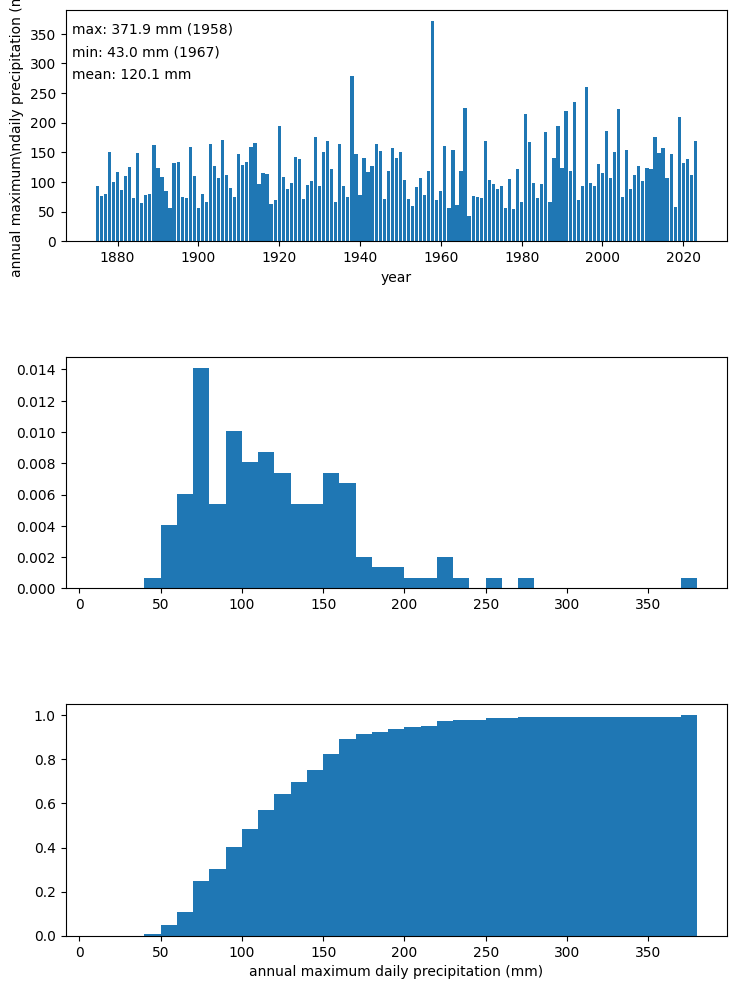

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------------------------------
# データの読み込み
#year = []
#annual_max_daily_prcp = []
#i = 0
#with open('data.csv', 'r') as fin:
#    for line in fin:
#        if i > 1:
#            data = line.split(',')
#            year.append(int(data[0]))
#            annual_max_daily_prcp.append(float(data[1].replace(']', '')))
#        i += 1


year = df["year"].values
annual_max_daily_prcp = df["annual_max_daily_prcp"].values

# ndarrayに変換
year = np.array(year)
annual_max_daily_prcp = np.array(annual_max_daily_prcp)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(year, annual_max_daily_prcp)

ax01.set_xlabel('year')
ax01.set_ylabel('annual maximum\\ndaily precipitation (mm)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {annual_max_daily_prcp.max()} mm ({year[np.argmax(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {annual_max_daily_prcp.min()} mm ({year[np.argmin(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {annual_max_daily_prcp.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# bin のためのリストを作成する
bins = [10*(i+1) for i in range(int(annual_max_daily_prcp.max()/10) + 1)]

# ヒストグラムを表示
ax02.hist(annual_max_daily_prcp, bins=bins, density=True)

# 累積ヒストグラムを表示
ax03.hist(annual_max_daily_prcp, bins=bins, cumulative=True, density=True)
ax03.set_xlabel('annual maximum daily precipitation (mm)')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

In [11]:
print(year)

           year
0      1875/4/1
1      1875/5/1
2      1875/6/1
3      1875/7/1
4      1875/8/1
...         ...
1767   2022/7/1
1768   2022/8/1
1769   2022/9/1
1770  2022/10/1
1771  2022/11/1

[1772 rows x 1 columns]
